# An Introduction to Apache Spark

Apache Spark is a distributed processing system used to perform big data and machine learning tasks on large datasets.

As a data science enthusiast, you are probably familiar with storing files on your local device and processing it using languages like R and Python. However, local workstations have their limitations and cannot handle extremely large datasets.

This is where a distributed processing system like Apache Spark comes in. Distributed processing is a setup in which multiple processors are used to run an application. Instead of trying to process large datasets on a single computer, the task can be divided between multiple devices that communicate with each other.

With Apache Spark, users can run queries and machine learning workflows on petabytes of data, which is impossible to do on your local device.

This framework is even faster than previous data processing engines like Hadoop, and has increased in popularity in the past eight years. Companies like IBM, Amazon, and Yahoo are using Apache Spark as their computational framework.

The ability to analyze data and train machine learning models on large-scale datasets is a valuable skill to have if you want to become a data scientist. Having the expertise to work with big data frameworks like Apache Spark will set you apart from others in the field.

## What is PySpark?

PySpark is an interface for Apache Spark in Python. With PySpark, you can write Python and SQL-like commands to manipulate and analyze data in a distributed processing environment. 

## What is PySpark used for?

Most data scientists and analysts are familiar with Python and use it to implement machine learning workflows. PySpark allows them to work with a familiar language on large-scale distributed datasets.


## Why PySpark?

Companies that collect terabytes of data will have a big data framework like Apache Spark in place. To work with these large-scale datasets, knowledge of Python and R frameworks alone will not suffice.

You need to learn a framework that allows you to manipulate datasets on top of a distributed processing system, as most data-driven organizations will require you to do so. PySpark is a great place to get started, since its syntax is simple and can be picked up easily if you are already familiar with Python.

The reason companies choose to use a framework like PySpark is because of how quickly it can process big data. It is faster than libraries like Pandas and Dask, and can handle larger amounts of data than these frameworks. If you had over petabytes of data to process, for instance, Pandas and Dask would fail but PySpark would be able to handle it easily.

While it is also possible to write Python code on top of a distributed system like Hadoop, many organizations choose to use Spark instead and use the PySpark API since it is faster and can handle real-time data. With PySpark, you can write code to collect data from a source that is continuously updated, while data can only be processed in batch mode with Hadoop.

Apache Flink is a distributed processing system that has a Python API called PyFlink, and is actually faster than Spark in terms of performance. However, Apache Spark has been around for a longer period of time and has better community support, which means that it is more reliable.

Furthermore, PySpark provides fault tolerance, which means that it has the capability to recover loss after a failure occurs. The framework also has in-memory computation and is stored in random access memory (RAM). It can run on a machine that does not have a hard-drive or SSD installed.


# End-to-end Machine Learning PySpark Tutorial

In this tutorial, I will show you how to execute an end-to-end customer segmentation project using the library.

Customer segmentation is a marketing technique companies use to identify and group users who display similar characteristics. For instance, if you visit Starbucks only during the summer to purchase cold beverages, you can be segmented as a “seasonal shopper” and enticed with special promotions curated for the summer season.

Data scientists usually build unsupervised machine learning algorithms such as K-Means clustering or hierarchical clustering to perform customer segmentation. These models are great at identifying similar patterns between user groups that often go unnoticed by the human eye.

In this tutorial, we will use K-Means clustering to perform customer segmentation on the e-commerce dataset we downloaded earlier.

By the end of this tutorial, you will be familiar with the following concepts:

- Reading csv files with PySpark
- Exploratory Data Analysis with PySpark
- Grouping and sorting data
- Performing arithmetic operations
- Aggregating datasets
- Data Pre-Processing with PySpark
- Working with datetime values
- Type conversion
- Joining two dataframes
- The rank() function

## PySpark Machine Learning

- Creating a feature vector
- Standardizing data
- Building a K-Means clustering model
- Interpreting the model


# Step 1: Creating a SparkSession
A SparkSession is an entry point into all functionality in Spark, and is required if you want to build a dataframe in PySpark. Run the following lines of code to initialize a SparkSession

In [244]:
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession

In [245]:
spark = SparkSession.builder.appName("Pyspark Tutorial").getOrCreate()

Using the codes above, we built a spark session and set a name for the application.

# Step 2: Creating the DataFrame

This code creates a SparkSession object named "spark" using the builder design pattern in PySpark.
- The appName parameter sets the name of the application to "Datacamp Pyspark Tutorial".
- The two config parameters enable off-heap memory and set the size of the off-heap memory to 10 gigabytes.
- Finally, the getOrCreate() method returns an existing SparkSession or creates a new one if none exists.


In [246]:
df = spark.read.csv('eCommerce.csv',header=True,escape="\"")

Note that we defined an escape character to avoid commas in the .csv file when parsing.

Let’s take a look at the head of the dataframe using the show() function

In [247]:
# Code Explanation
# - The second argument 0 specifies that the method should not truncate the displayed columns.
# - This is useful when working with large datasets where the default behavior is to truncate the columns to fit the screen.
# - By setting the second argument to 0, all columns will be displayed without truncation

df.show(5,0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+

|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+

|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|

|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|

|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|

|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|

|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|

+---------+---------+-----------------------------------+-------

The dataframe consists of 8 variables:

- InvoiceNo: The unique identifier of each customer invoice.
- StockCode: The unique identifier of each item in stock.
- Description: The item purchased by the customer.
- Quantity: The number of each item purchased by a customer in a single invoice.
- InvoiceDate: The purchase date.
- UnitPrice: Price of one unit of each item.
- CustomerID: Unique identifier assigned to each user.
- Country: The country from where the purchase was made

# Step 3: Exploratory Data Analysis

Now that we have seen the variables present in this dataset, let’s perform some exploratory data analysis to further understand these data points:

Let’s start by counting the number of rows in the dataframe:

In [248]:
df.count() 

2500

## How many unique customers are present in the dataframe?

In [249]:
df.select('CustomerID').distinct().count()

95

## What country do most purchases come from?

To find the country from which most purchases are made, we need to use the groupBy() clause in PySpark

In [250]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Code Explanation
# - The code uses the groupBy() method to group the data in the DataFrame df by the Country column.
# - The agg() method is then used to apply an aggregation function to each group.
# - In this case, the countDistinct() function is used to count the number of distinct CustomerID values in each group.
# - The alias() method is used to rename the resulting column to country_count.
# - Finally, the show() method is used to display the resulting DataFrame in a tabular format.
# - This will show the number of distinct customers for each country in the Country column of the original DataFrame.
    
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).show()

+--------------+-------------+

|       Country|country_count|

+--------------+-------------+

|       Germany|            2|

|        France|            1|

|          EIRE|            1|

|        Norway|            1|

|     Australia|            1|

|United Kingdom|           88|

|   Netherlands|            1|

+--------------+-------------+




Almost all the purchases on the platform were made from the United Kingdom, and only a handful were made from countries like Germany, Australia, and France. 

Notice that the data in the table above isn’t presented in the order of purchases. To sort this table, we can include the orderBy() clause

In [251]:
#Code Explanation
# - The code is performing a group by operation on a DataFrame called df based on the 'Country' column.
# - It then aggregates the number of distinct 'CustomerID' values for each country using the countDistinct function.
# - The resulting column is then renamed as 'country_count' using the alias function.
# - Finally, the resulting DataFrame is sorted in descending order based on the 'country_count' column using the orderBy function and displayed using the show function.
# - Overall, this code is counting the number of unique customers for each country in the DataFrame and displaying the results in descending order.
    
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(desc('country_count')).show()

+--------------+-------------+

|       Country|country_count|

+--------------+-------------+

|United Kingdom|           88|

|       Germany|            2|

|        France|            1|

|          EIRE|            1|

|        Norway|            1|

|     Australia|            1|

|   Netherlands|            1|

+--------------+-------------+




## When was the most recent purchase made by a customer on the e-commerce platform?
To find when the latest purchase was made on the platform, we need to convert the “InvoiceDate” column into a timestamp format and use the max() function in Pyspark:

In [252]:
# • The first line sets the configuration property spark.sql.legacy.timeParserPolicy to LEGACY.
# • This property determines how Spark parses timestamps in SQL queries.
# • Setting it to LEGACY means that Spark will use the old timestamp parsing behavior, which is more lenient and can handle a wider range of timestamp formats.
# • The second line creates a new column called date in the DataFrame df.
# • The values in this column are generated by applying the to_timestamp function to the InvoiceDate column in df.
# • The second argument to to_timestamp specifies the format of the timestamp string in InvoiceDate.
# • In this case, the format is yy/MM/dd HH:mm, which means that the timestamp string should have a two-digit year (yy), followed by a slash (/), then a two-digit month (MM), another slash, a two-digit day (dd), a space, a two-digit hour (HH), and a colon (:), and finally a two-digit minute (mm).
# • The third line selects the maximum value in the date column and displays it using the show method.
# • This line effectively finds the latest date in the InvoiceDate column and displays it in a human-readable format.

spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date',to_timestamp("InvoiceDate", 'yy/MM/dd HH:mm'))
df.select(max("date")).show()

+-------------------+

|          max(date)|

+-------------------+

|2012-01-10 17:06:00|

+-------------------+




## When was the earliest purchase made by a customer on the e-commerce platform?
Similar to what we did above, the min() function can be used to find the earliest purchase date and time

In [253]:
# • The select() method is used to select a specific column or set of columns from the DataFrame.
# • In this case, the min() function is used to find the minimum value of the "date" column.
# • The show() method is then used to display the result of the operation.
# • This will print the minimum value of the "date" column to the console.

df.select(min("date")).show()

+-------------------+

|          min(date)|

+-------------------+

|2012-01-10 08:26:00|

+-------------------+




Notice that the most recent and earliest purchases were made on the same day just a few hours apart. This means that the dataset we downloaded contains information of only purchases made on a single day.

# Step 4: Data Pre-processing

Now that we have analyzed the dataset and have a better understanding of each data point, we need to prepare the data to feed into the machine learning algorithm.

Let’s take a look at the head of the dataframe once again to understand how the pre-processing will be done

In [254]:
df.show(5,0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+

|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+

|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|2012-01-10 08:26:00|

|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|

|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|2012-01-10 08:26:00|

|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|

|536365   |84029E   |RED WOOLLY HOTTIE WH

From the dataset above, we need to create multiple customer segments based on each user’s purchase behavior. 

The variables in this dataset are in a format that cannot be easily ingested into the customer segmentation model. These features individually do not tell us much about customer purchase behavior.

Due to this, we will use the existing variables to derive three new informative features - recency, frequency, and monetary value (RFM).

[RFM]([https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp](http://))  is commonly used in marketing to evaluate a client’s value based on their:

- Recency: How recently has each customer made a purchase?
- Frequency: How often have they bought something?
- Monetary Value: How much money do they spend on average when making purchases?
- We will now preprocess the dataframe to create the above variables.

**Recency**

First, let’s calculate the value of recency - the latest date and time a purchase was made on the platform. This can be achieved in two steps:

i) Assign a recency score to each customer
We will subtract every date in the dataframe from the earliest date. This will tell us how recently a customer was seen in the dataframe. A value of 0 indicates the lowest recency, as it will be assigned to the person who was seen making a purchase on the earliest date.

In [255]:
# • The first line creates a new column called "from_date" in the PySpark DataFrame "df" and sets all values in this column to the string "12/1/10 08:26".
# • The second line converts the "from_date" column from a string to a timestamp format using the "to_timestamp" function.
# • The second argument of this function specifies the format of the input string.
# • The third line creates a new DataFrame called "df2" by applying two transformations to the original DataFrame "df".
# • The first transformation converts the "from_date" column to a timestamp format using the "to_timestamp" function with no arguments.
# • The second transformation creates a new column called "recency" by subtracting the Unix timestamp of the "from_date" column from the Unix timestamp of the "date" column.
# • The "col" function is used to reference columns in the DataFrame.

df = df.withColumn("from_date", lit("12/1/10 08:26"))
df = df.withColumn('from_date',to_timestamp("from_date", 'yy/MM/dd HH:mm'))

df2 = df.withColumn('recency',col("date").cast("long") - col('from_date').cast("long"))

In [256]:
df2.show(5)

+---------+---------+--------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+-------+

|InvoiceNo|StockCode|         Description|Quantity| InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|recency|

+---------+---------+--------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+-------+

|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/10 8:26|     2.55|     17850|United Kingdom|2012-01-10 08:26:00|2012-01-10 08:26:00|      0|

|   536365|    71053| WHITE METAL LANTERN|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|2012-01-10 08:26:00|2012-01-10 08:26:00|      0|

|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/10 8:26|     2.75|     17850|United Kingdom|2012-01-10 08:26:00|2012-01-10 08:26:00|      0|

|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|

ii) Select the most recent purchase

One customer can make multiple purchases at different times. We need to select only the last time they were seen buying a product, as this is indicative of when the most recent purchase was made: 

In [257]:
# • The code is joining a DataFrame df2 with the result of a groupBy operation on the column 'CustomerID'.
# • The groupBy operation is finding the maximum value of the 'recency' column for each unique 'CustomerID'.
# • The agg function is used to apply the max function to the 'recency' column and alias the resulting column as 'recency'.
# • The join function is then used to join df2 with the result of the groupBy operation.
# • The on parameter specifies that the join should be performed on the 'recency' column.
# • The how parameter is set to 'leftsemi', which means that only the rows from df2 that have a matching 'recency' value in the result of the groupBy operation will be included in the final DataFrame.

df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')),on='recency',how='leftsemi')

Let’s look at the head of the new dataframe. It now has a variable called “recency” appended to it:

In [258]:
df2.show(5,0)

+-------+---------+---------+-------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+

|recency|InvoiceNo|StockCode|Description                    |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |from_date          |

+-------+---------+---------+-------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+

|540    |536369   |21756    |BATH BUILDING BLOCK WORD       |3       |12/1/10 8:35|5.95     |13047     |United Kingdom|2012-01-10 08:35:00|2012-01-10 08:26:00|

|1140   |536370   |22728    |ALARM CLOCK BAKELIKE PINK      |24      |12/1/10 8:45|3.75     |12583     |France        |2012-01-10 08:45:00|2012-01-10 08:26:00|

|1140   |536370   |22727    |ALARM CLOCK BAKELIKE RED       |24      |12/1/10 8:45|3.75     |12583     |France        |2012-01-10 08:45:00|2012-01-10 08:26:00|

|1140   |536370   |22726    |ALARM

An easier way to view all the variables present in a PySpark dataframe is to use its printSchema() function. This is the equivalent of the info() function in Pandas:

In [259]:
# • The printSchema() method is a function provided by the Apache Spark DataFrame API that prints the schema of the DataFrame to the console.
# • The schema of a DataFrame describes the structure of the data, including the names and data types of each column.

df2.printSchema()

root

 |-- recency: long (nullable = true)

 |-- InvoiceNo: string (nullable = true)

 |-- StockCode: string (nullable = true)

 |-- Description: string (nullable = true)

 |-- Quantity: string (nullable = true)

 |-- InvoiceDate: string (nullable = true)

 |-- UnitPrice: string (nullable = true)

 |-- CustomerID: string (nullable = true)

 |-- Country: string (nullable = true)

 |-- date: timestamp (nullable = true)

 |-- from_date: timestamp (nullable = true)




**Frequency**

Let’s now calculate the value of frequency - how often a customer bought something on the platform. To do this, we just need to group by each customer ID and count the number of items they purchased:




In [260]:
# • The code creates a new DataFrame called df_freq by grouping the rows of an existing DataFrame df2 by the values in the CustomerID column.
# • The groupBy method is used to group the rows by the specified column.
# • The agg method is then used to aggregate the data in each group.
# • In this case, the count function is used to count the number of rows in each group that have a non-null value in the InvoiceDate column.
# • The alias method is used to rename the resulting column to frequency.
# • So, the resulting df_freq DataFrame will have one row for each unique value in the CustomerID column, and the frequency column will contain the number of non-null values in the InvoiceDate column for each group.

df_freq = df2.groupBy('CustomerID').agg(count('InvoiceDate').alias('frequency'))

In [261]:
df_freq.show(5,0)

+----------+---------+

|CustomerID|frequency|

+----------+---------+

|16250     |14       |

|15100     |1        |

|13065     |14       |

|12838     |59       |

|15350     |5        |

+----------+---------+

only showing top 5 rows




There is a frequency value appended to each customer in the dataframe. This new dataframe only has two columns, and we need to join it with the previous one:

In [262]:
# • An inner join returns only the rows that have matching values in both dataframes on the specified column.
# • The join() function is a method of the dataframe object in pandas library and it takes the following parameters: df_freq: the dataframe to join with df2 on: the column name to join on how: the type of join to perform, in this case, an inner join.

df3 = df2.join(df_freq,on='CustomerID',how='inner')

In [263]:
df3.printSchema()

root

 |-- CustomerID: string (nullable = true)

 |-- recency: long (nullable = true)

 |-- InvoiceNo: string (nullable = true)

 |-- StockCode: string (nullable = true)

 |-- Description: string (nullable = true)

 |-- Quantity: string (nullable = true)

 |-- InvoiceDate: string (nullable = true)

 |-- UnitPrice: string (nullable = true)

 |-- Country: string (nullable = true)

 |-- date: timestamp (nullable = true)

 |-- from_date: timestamp (nullable = true)

 |-- frequency: long (nullable = false)




**Monetary Value**

Finally, let’s calculate monetary value - the total amount spent by each customer in the dataframe. There are two steps to achieving this:

i) Find the total amount spent in each purchase:
Each customerID comes with variables called “Quantity” and “UnitPrice” for a single purchase:

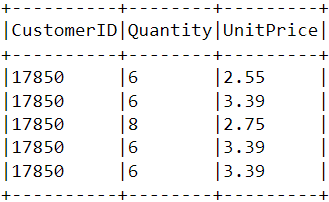

To get the total amount spent by each customer in one purchase, we need to multiply “Quantity” with “UnitPrice”:

In [264]:
# • The code creates a new column called "TotalAmount" in the PySpark DataFrame "df3".
# • The values in this column are calculated by multiplying the values in the "Quantity" column by the values in the "UnitPrice" column for each row in the DataFrame.
# • The "withColumn" function is used to add a new column to the DataFrame.
# • The first argument is the name of the new column, and the second argument is the calculation to be performed on each row to populate the new column.
# • The "col" function is used to reference a column in the DataFrame.
# • It takes the name of the column as an argument and returns a Column object that can be used in calculations.

m_val = df3.withColumn('TotalAmount',col("Quantity") * col("UnitPrice"))

ii) Find the total amount spent by each customer:

To find the total amount spent by each customer overall, we just need to group by the CustomerID column and sum the total amount spent:

In [265]:
# • The groupBy method is used to group the data in the m_val DataFrame by the CustomerID column.
# • The agg method is then used to aggregate the data by summing the values in the TotalAmount column for each group.
# • The alias method is used to rename the resulting column as monetary_value.
# • The resulting DataFrame will have one row for each unique CustomerID value, with the monetary_value column containing the sum of the TotalAmount values for that customer.

m_val = m_val.groupBy('CustomerID').agg(sum('TotalAmount').alias('monetary_value'))

Merge this dataframe with the all the other variables:

In [266]:
finaldf = m_val.join(df3,on='CustomerID',how='inner')

Now that we have created all the necessary variables to build the model, run the following lines of code to select only the required columns and drop duplicate rows from the dataframe:

In [267]:
finaldf = finaldf.select(['recency','frequency','monetary_value','CustomerID']).distinct()

In [268]:
finaldf.show(5, 0)

+-------+---------+------------------+----------+

|recency|frequency|monetary_value    |CustomerID|

+-------+---------+------------------+----------+

|5580   |14       |226.14            |16250     |

|2580   |1        |350.4             |15100     |

|30360  |14       |205.85999999999999|13065     |

|12660  |59       |390.78999999999985|12838     |

|18420  |5        |115.65            |15350     |

+-------+---------+------------------+----------+

only showing top 5 rows




**Standardization**

Before building the customer segmentation model, let’s standardize the dataframe to ensure that all the variables are around the same scale:

In [269]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

# • First, it imports the necessary modules for feature engineering: VectorAssembler and StandardScaler.
# • Next, it creates a VectorAssembler object called assemble that takes in three input columns (recency, frequency, and monetary_value) and outputs a single column called features.
# • This combines the three input columns into a single vector that can be used as input for machine learning algorithms.
# • Then, it applies the assemble transformation to the finaldf dataset using the transform method, and stores the result in assembled_data.
# • After that, it creates a StandardScaler object called scale that takes in the features column from assembled_data and outputs a new column called standardized.
# • This scales the features column so that each feature has a mean of 0 and a standard deviation of 1.
# • This is important for some machine learning algorithms that require standardized input.
# • Finally, it applies the scale transformation to assembled_data using the fit and transform methods, and stores the result in data_scale_output.
# • This gives us a new dataset where the features column has been standardized.

assemble=VectorAssembler(inputCols=[
    'recency','frequency','monetary_value'
], outputCol='features')

assembled_data=assemble.transform(finaldf)

scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

Run the following lines of code to see what the standardized feature vector looks like:

In [270]:
data_scale_output.select('standardized').show(2,truncate=False)

+-----------------------------------------------------------+

|standardized                                               |

+-----------------------------------------------------------+

|[0.6860448646904733,0.6848507976304105,0.45968090513788235]|

|[0.3172035395880683,0.04891791411645789,0.7122675738936676]|

+-----------------------------------------------------------+

only showing top 2 rows




These are the scaled features that will be fed into the clustering algorithm.

# Step 5: Building the Machine Learning Model

Now that we have completed all the data analysis and preparation, let’s build the K-Means clustering model. 

The algorithm will be created using PySpark’s machine learning API.

**i) Finding the number of clusters to use**

When building a K-Means clustering model, we first need to determine the number of clusters or groups we want the algorithm to return. If we decide on three clusters, for instance, then we will have three customer segments.

The most popular technique used to decide on how many clusters to use in K-Means is called the “elbow-method.”

This is done simply running the K-Means algorithm for a wide range of clusters and visualizing the model results for each cluster. The plot will have an inflection point that looks like an elbow, and we just pick the number of clusters at this point.

Let’s run the following lines of code to build a K-Means clustering algorithm from 2 to 10 clusters:

In [271]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

# This code imports the necessary libraries for performing KMeans clustering using PySpark.
# • It then initializes an array of zeros with length 10 to store the cost of each KMeans model.
# • Next, it creates an instance of the ClusteringEvaluator class, which will be used to evaluate the quality of the clustering results.
# • The evaluator is configured to use the silhouette metric with squared Euclidean distance.
# • The code then enters a loop that iterates over values of k from 2 to 9.
# • For each value of k, a KMeans algorithm is created with the specified number of clusters and the standardized features column.
# • The algorithm is then fit to the data and used to transform the data to obtain the cluster assignments.
# • Finally, the training cost of the KMeans model is stored in the cost array at the index corresponding to the current value of k.
# • The training cost is a measure of how well the model fits the data, and is calculated as the sum of squared distances between each point and its assigned cluster center.


cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    output=KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

With the codes above, we have successfully built and evaluated a K-Means clustering model with 2 to 10 clusters. The results have been placed in an array, and can now be visualized in a line chart.

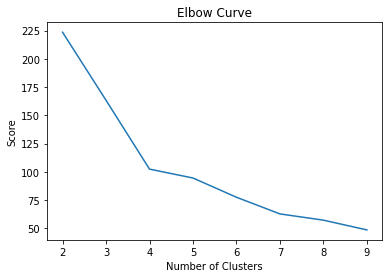

In [272]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**ii) Building the K-Means Clustering Model**

From the plot above, we can see that there is an inflection point that looks like an elbow at four. Due to this, we will proceed to build the K-Means algorithm with four clusters:




In [273]:
KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)

**iii) Making Predictions**

Let’s use the model we created to assign clusters to each customer in the dataset:

In [274]:
preds=KMeans_fit.transform(data_scale_output)

preds.show(5,0)

+-------+---------+------------------+----------+---------------------------------+-----------------------------------------------------------+----------+

|recency|frequency|monetary_value    |CustomerID|features                         |standardized                                               |prediction|

+-------+---------+------------------+----------+---------------------------------+-----------------------------------------------------------+----------+

|5580   |14       |226.14            |16250     |[5580.0,14.0,226.14]             |[0.6860448646904733,0.6848507976304105,0.45968090513788235]|0         |

|2580   |1        |350.4             |15100     |[2580.0,1.0,350.4]               |[0.3172035395880683,0.04891791411645789,0.7122675738936676]|0         |

|30360  |14       |205.85999999999999|13065     |[30360.0,14.0,205.85999999999999]|[3.732674210036339,0.6848507976304105,0.4184571996625297]  |2         |

|12660  |59       |390.78999999999985|12838     |[12660.0,59.0,3

# Step 6: Cluster Analysis
The final step in this entire tutorial is to analyze the customer segments we just built.

Run the following lines of code to visualize the recency, frequency, and monetary value of each customerID in the dataframe:

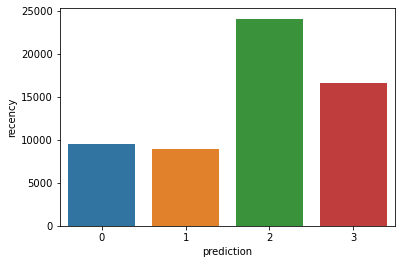

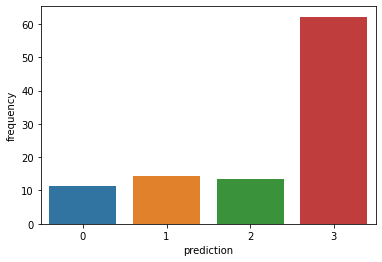

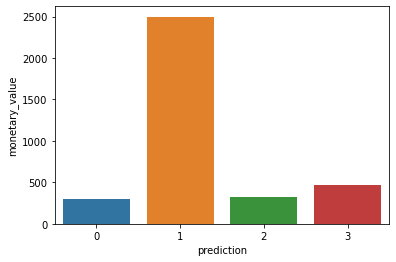

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('recency','frequency','monetary_value','prediction')
df_viz = df_viz.toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['recency','frequency','monetary_value']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()

Here is an overview of characteristics displayed by customers in each cluster:

**Cluster 0**: Customers in this segment display low recency, frequency, and monetary value. They rarely shop on the platform and are low potential customers who are likely to stop doing business with the ecommerce company.

**Cluster 1**: Users in this cluster display high recency but haven’t been seen spending much on the platform. They also don’t visit the site often. This indicates that they might be newer customers who have just started doing business with the company.

**Cluster 2**: Customers in this segment display medium recency and frequency and spend a lot of money on the platform. This indicates that they tend to buy high-value items or make bulk purchases.

**Cluster 3**: The final segment comprises users who display high recency and make frequent purchases on the platform. However, they don’t spend much on the platform, which might mean that they tend to select cheaper items in each purchase.
